# RUN Step 1 - 9

In [66]:
import numpy as np
import pandas as pd
# %matplotlib inline
import matplotlib.pyplot as plt

## Step 1 - 3


1.   Download the sample Python code that comes with the assigned textbook, Python Machine Learning*.
2.   Use the Iris dataset that's referenced in the text. (add page reference)
3.   You can use the sample code from the text as a starting point or you can write your own code from scratch.


#### MODELS

In [67]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02, ax=None):

    ax = ax or plt.gca()

    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    ax.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=colors[idx],
                   marker=markers[idx], label=f'Class {cl}',
                   edgecolor='black')

In [68]:
class Perceptron:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta  # 学习率
        self.n_iter = n_iter  # 迭代次数
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)


In [69]:
class AdalineGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)

            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

In [70]:
class AdalineSGD:

    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self

    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float_(0.)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

#### IMPORT DATASET

In [71]:
# READ IRIS DATA

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('From URL:', s)
df = pd.read_csv(s, header=None, encoding='utf-8')
df

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Step 4
Pick two classes of data (i.e., two species of Iris) and two features from the four in the dataset, so that the data for two species are linearly separable using the features that you have chosen.

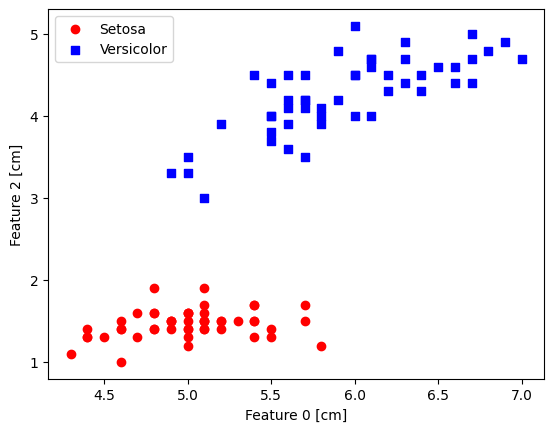

In [72]:
# select Class 0 and Class 1 (Versicolor and versicolor)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# extract Feature 0 and Feature 2
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='s', label='Versicolor')

plt.xlabel('Feature 0 [cm]')
plt.ylabel('Feature 2 [cm]')
plt.legend(loc='upper left')

plt.show()

### TRAIN

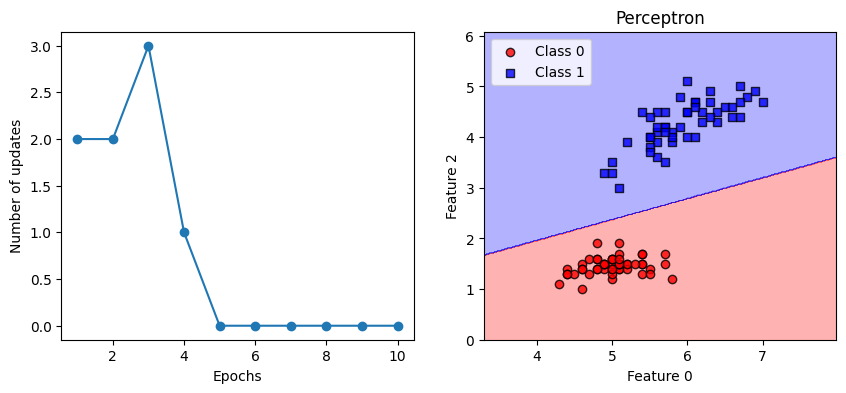

In [73]:
# PERCEPTRON
ppn = Perceptron(eta=0.01, n_iter=10)
ppn.fit(X, y)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# ERRORS VS EPOCHS
ax[0].plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Number of updates')

# PLOT DECISION REGIONS
plot_decision_regions(X, y, classifier=ppn)
ax[1].set_title('Perceptron')
ax[1].set_xlabel('Feature 0')
ax[1].set_ylabel('Feature 2')
ax[1].legend(loc='upper left')

plt.show()

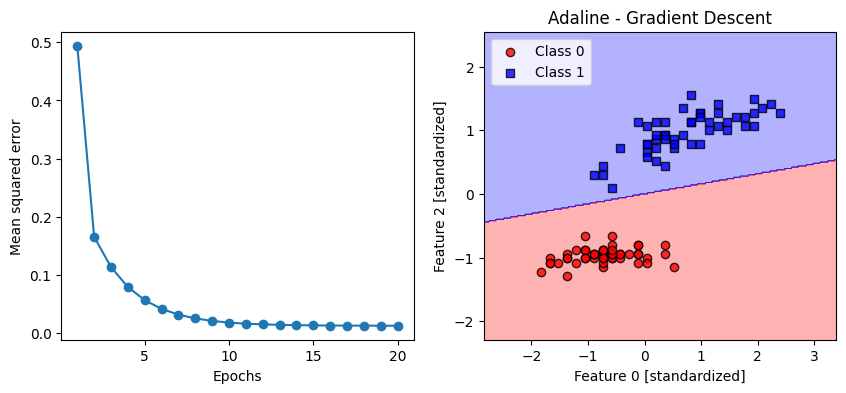

In [74]:
# ADALINE GD

# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

# TRAIN
ada_gd = AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# ERRORS VS EPOCHS
ax[0].plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Mean squared error')

# PLOT DECISION REGIONS
plot_decision_regions(X_std, y, classifier=ada_gd)
ax[1].set_title('Adaline - Gradient Descent')
ax[1].set_xlabel('Feature 0 [standardized]')
ax[1].set_ylabel('Feature 2 [standardized]')
ax[1].legend(loc='upper left')

plt.show()

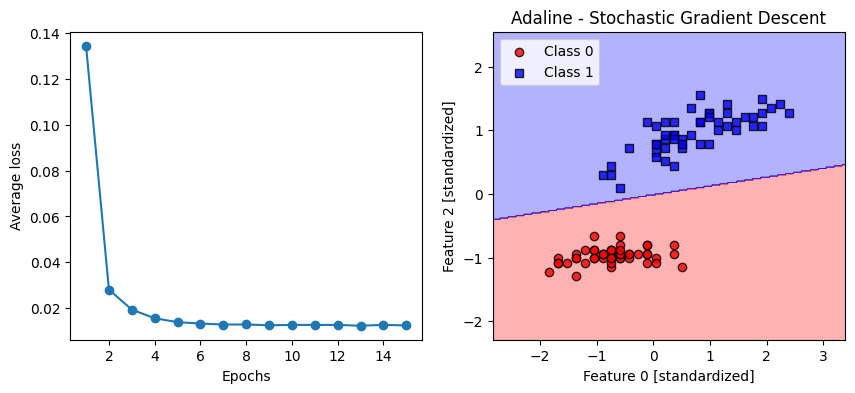

In [75]:
# Adaline SGD

# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

# TRAIN
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# ERRORS VS EPOCHS
ax[0].plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Average loss')

# PLOT DECISION REGIONS
plot_decision_regions(X_std, y, classifier=ada_sgd)
ax[1].set_title('Adaline - Stochastic Gradient Descent')
ax[1].set_xlabel('Feature 0 [standardized]')
ax[1].set_ylabel('Feature 2 [standardized]')
ax[1].legend(loc='upper left')

plt.show()


## Step 5
Repeat Step 4) using three features at a time.

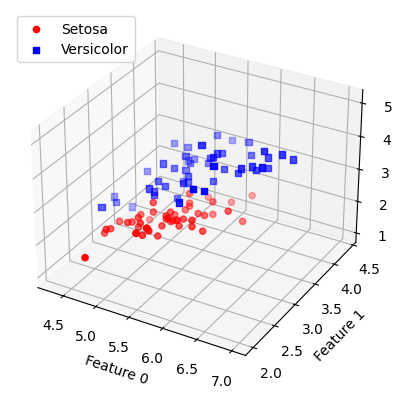

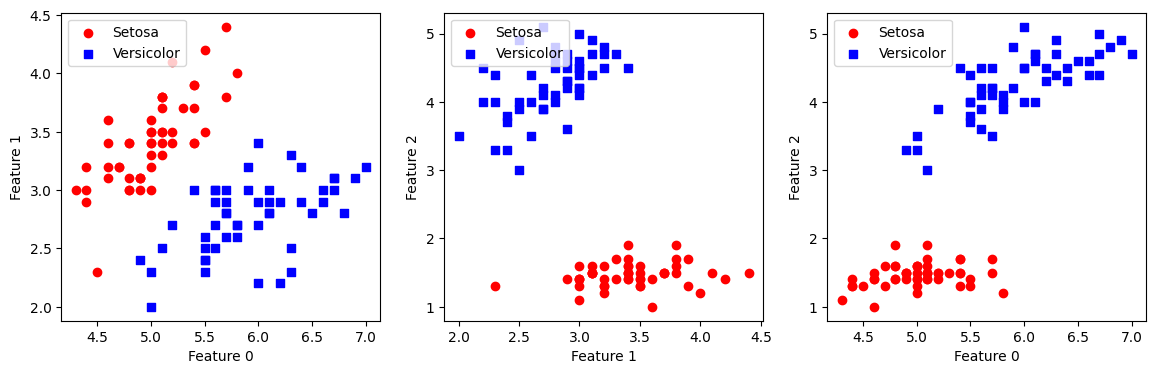

In [76]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# extract Feature 0, 1, and 2
X = df.iloc[0:100, 0:3].values


# PLOT DATA
axes = plt.axes(projection = '3d')
axes.scatter3D(X[:50, 0], X[:50, 1], X[:50, 2],
            color='red', marker='o', label='Setosa')
axes.scatter3D(X[50:100, 0], X[50:100, 1], X[50:100, 2],
            color='blue', marker='s', label='Versicolor')

axes.set_xlabel('Feature 0')
axes.set_ylabel('Feature 1')
axes.set_zlabel('Feature 2')
plt.legend(loc='upper left')

plt.show()


# PLOT 3 FEATURES
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))

# Feature 0 vs Feature 1
ax[0].scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Setosa')
ax[0].scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='s', label='Versicolor')

ax[0].set_xlabel('Feature 0')
ax[0].set_ylabel('Feature 1')
ax[0].legend(loc='upper left')

# Feature 1 vs Feature 2
ax[1].scatter(X[:50, 1], X[:50, 2],
            color='red', marker='o', label='Setosa')
ax[1].scatter(X[50:100, 1], X[50:100, 2],
            color='blue', marker='s', label='Versicolor')

ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')
ax[1].legend(loc='upper left')

# Feature 0 vs Feature 2
ax[2].scatter(X[:50, 0], X[:50, 2],
            color='red', marker='o', label='Setosa')
ax[2].scatter(X[50:100, 0], X[50:100, 2],
            color='blue', marker='s', label='Versicolor')

ax[2].set_xlabel('Feature 0')
ax[2].set_ylabel('Feature 2')
ax[2].legend(loc='upper left')

plt.show()

### TRAIN

Text(0, 0.5, 'Number of updates')

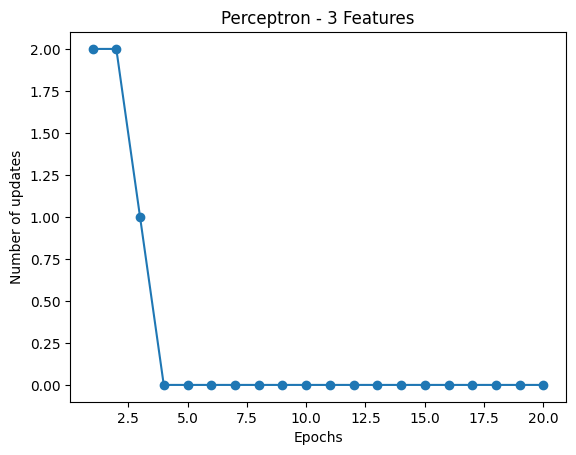

In [77]:
# PERCEPTRON
ppn = Perceptron(eta=0.01, n_iter=20)
ppn.fit(X, y)

# ERRORS VS EPOCHS
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.title('Perceptron - 3 Features')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

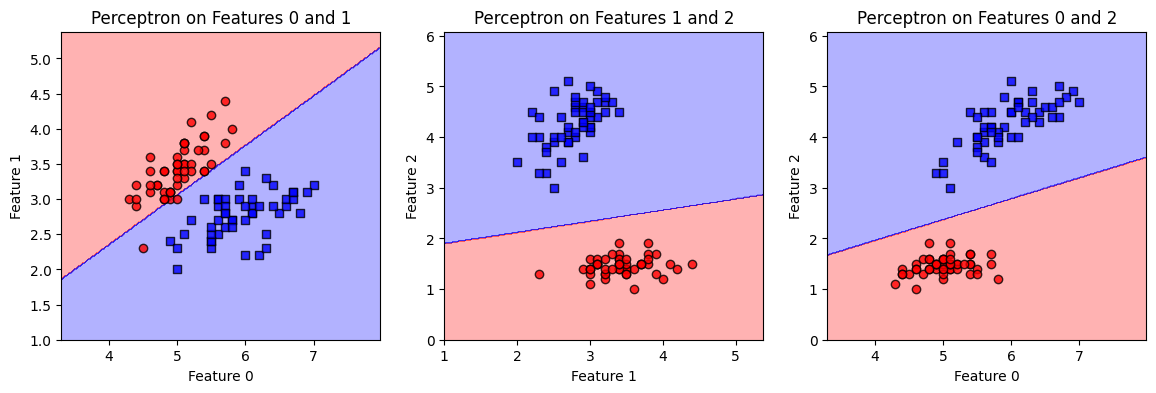

In [78]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))

# Feature 0, Feature 1
X1 = df.iloc[0:100, [0, 1]].values
ppn = Perceptron(eta=0.001, n_iter=100)
ppn.fit(X1, y)
plot_decision_regions(X1, y, classifier=ppn, ax=ax[0])
ax[0].set_title('Perceptron on Features 0 and 1')
ax[0].set_xlabel('Feature 0')
ax[0].set_ylabel('Feature 1')

# Feature 1, Feature 2
X2 = df.iloc[0:100, [1, 2]].values
ppn = Perceptron(eta=0.001, n_iter=50)
ppn.fit(X2, y)
plot_decision_regions(X2, y, classifier=ppn, ax=ax[1])
ax[1].set_title('Perceptron on Features 1 and 2')
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')

# Feature 0, Feature 2
X3 = df.iloc[0:100, [0, 2]].values
ppn = Perceptron(eta=0.01, n_iter=10)
ppn.fit(X3, y)
plot_decision_regions(X3, y, classifier=ppn, ax=ax[2])
ax[2].set_title('Perceptron on Features 0 and 2')
ax[2].set_xlabel('Feature 0')
ax[2].set_ylabel('Feature 2')

plt.show()


Text(0, 0.5, 'Mean squared error')

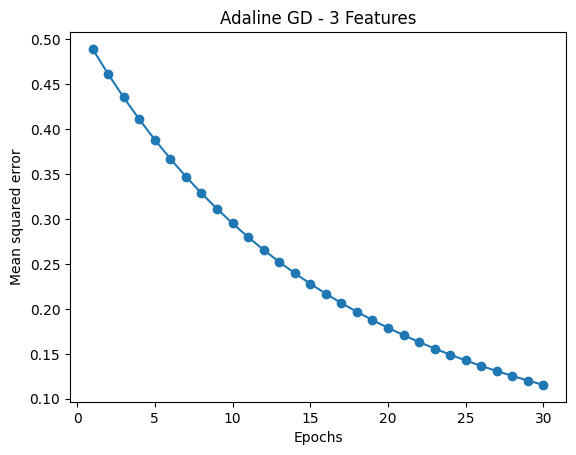

In [79]:
# Adaline GD

# Standardize Features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
X_std[:, 2] = (X[:, 2] - X[:, 2].mean()) / X[:, 2].std()

# TRAIN
ada_gd = AdalineGD(n_iter=30, eta=0.01)
ada_gd.fit(X_std, y)

# ERRORS VS EPOCHS
plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
plt.title('Adaline GD - 3 Features')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')

Text(0, 0.5, 'Average loss')

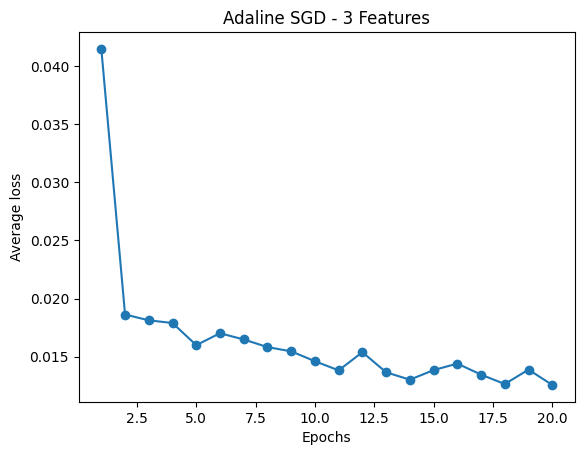

In [80]:
# Adaline SGD

# Standardize Features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

# TRAIN
ada_sgd = AdalineSGD(n_iter=20, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

# ERRORS VS EPOCHS
plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.title('Adaline SGD - 3 Features')
plt.xlabel('Epochs')
plt.ylabel('Average loss')

## Step 6
Repeat Step 4) using all four features at the same time.

In [81]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# extract all 4 features
X = df.iloc[0:100, 0:4].values

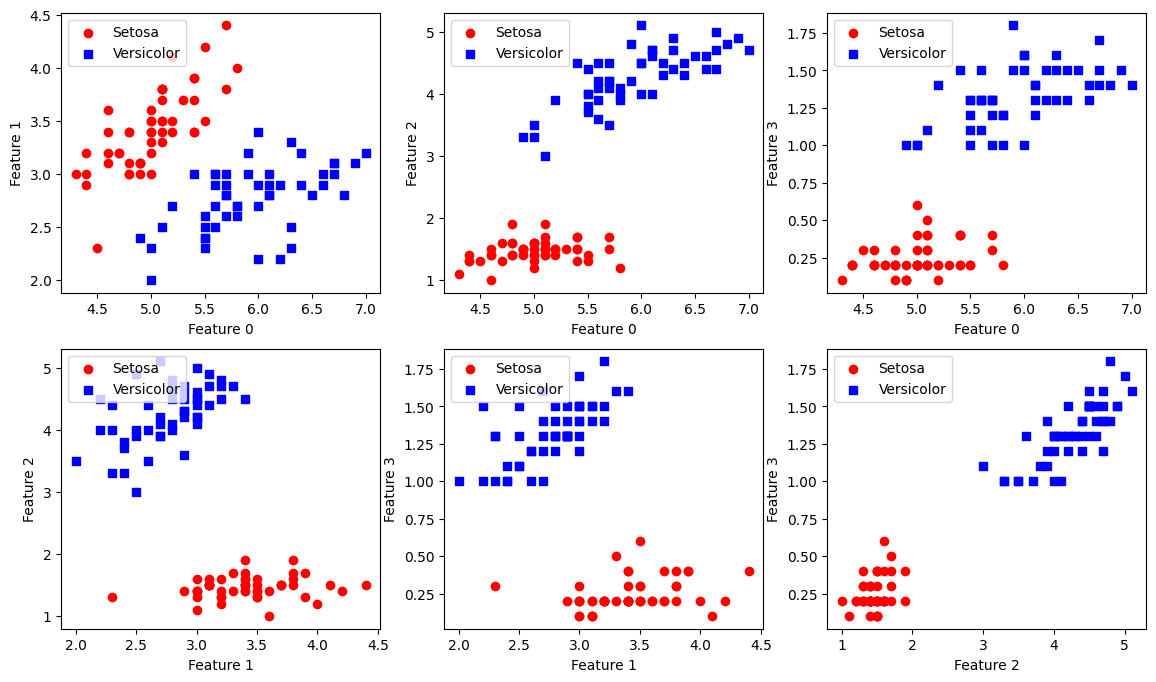

In [82]:
# PLOT 4 FEATURES

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))

# Feature 0 vs Feature 1
ax[0, 0].scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Setosa')
ax[0, 0].scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='s', label='Versicolor')

ax[0, 0].set_xlabel('Feature 0')
ax[0, 0].set_ylabel('Feature 1')
ax[0, 0].legend(loc='upper left')

# Feature 0 vs Feature 2
ax[0, 1].scatter(X[:50, 0], X[:50, 2],
            color='red', marker='o', label='Setosa')
ax[0, 1].scatter(X[50:100, 0], X[50:100, 2],
            color='blue', marker='s', label='Versicolor')

ax[0, 1].set_xlabel('Feature 0')
ax[0, 1].set_ylabel('Feature 2')
ax[0, 1].legend(loc='upper left')

# Feature 0 vs Feature 3
ax[0, 2].scatter(X[:50, 0], X[:50, 3],
            color='red', marker='o', label='Setosa')
ax[0, 2].scatter(X[50:100, 0], X[50:100, 3],
            color='blue', marker='s', label='Versicolor')

ax[0, 2].set_xlabel('Feature 0')
ax[0, 2].set_ylabel('Feature 3')
ax[0, 2].legend(loc='upper left')

# Feature 1 vs Feature 2
ax[1, 0].scatter(X[:50, 1], X[:50, 2],
            color='red', marker='o', label='Setosa')
ax[1, 0].scatter(X[50:100, 1], X[50:100, 2],
            color='blue', marker='s', label='Versicolor')

ax[1, 0].set_xlabel('Feature 1')
ax[1, 0].set_ylabel('Feature 2')
ax[1, 0].legend(loc='upper left')

# Feature 1 vs Feature 3
ax[1, 1].scatter(X[:50, 1], X[:50, 3],
            color='red', marker='o', label='Setosa')
ax[1, 1].scatter(X[50:100, 1], X[50:100, 3],
            color='blue', marker='s', label='Versicolor')

ax[1, 1].set_xlabel('Feature 1')
ax[1, 1].set_ylabel('Feature 3')
ax[1, 1].legend(loc='upper left')

# Feature 2 vs Feature 3
ax[1, 2].scatter(X[:50, 2], X[:50, 3],
            color='red', marker='o', label='Setosa')
ax[1, 2].scatter(X[50:100, 2], X[50:100, 3],
            color='blue', marker='s', label='Versicolor')

ax[1, 2].set_xlabel('Feature 2')
ax[1, 2].set_ylabel('Feature 3')
ax[1, 2].legend(loc='upper left')


plt.show()

### TRAIN

Text(0, 0.5, 'Number of updates')

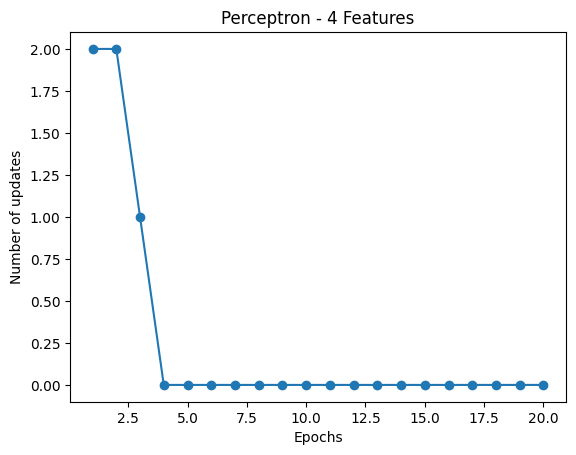

In [83]:
# PERCEPTRON

ppn = Perceptron(eta=0.01, n_iter=20)
ppn.fit(X, y)

# ERRORS VS EPOCHS
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.title('Perceptron - 4 Features')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

Text(0, 0.5, 'Mean squared error')

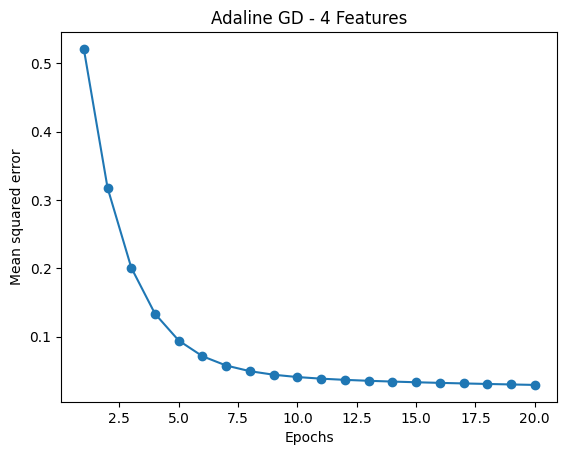

In [84]:
# Adaline GD

# Standardize Features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

# TRAIN
ada_gd = AdalineGD(n_iter=20, eta=0.01)
ada_gd.fit(X_std, y)

# ERRORS VS EPOCHS
plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
plt.title('Adaline GD - 4 Features')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')

Text(0, 0.5, 'Average loss')

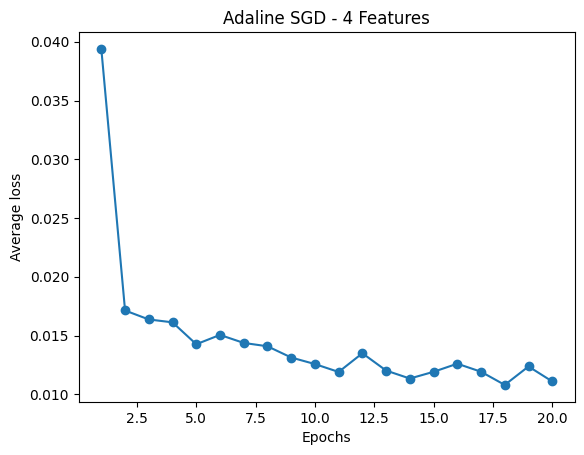

In [85]:
# Adaline SGD

# Standardize Features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

# TRAIN
ada_sgd = AdalineSGD(n_iter=20, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

# ERRORS VS EPOCHS
plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.title('Adaline SGD - 4 Features')
plt.xlabel('Epochs')
plt.ylabel('Average loss')

## Step 7
Pick two classes of data (i.e., two species of Iris) and two features from the four in the dataset, so that the data for two species are NOT linearly separable using the features that you have chosen.


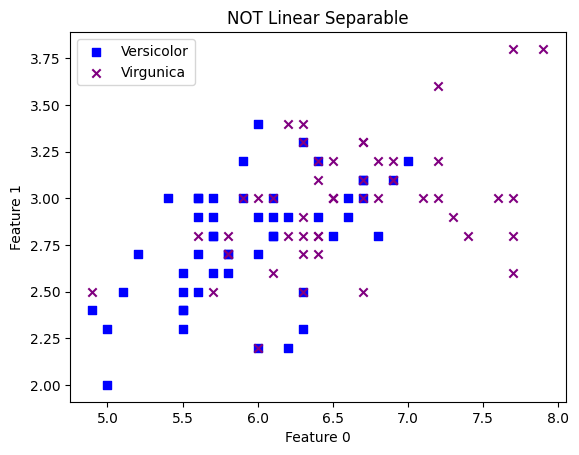

In [86]:
# select Class 1 and Class 2 (Versicolor and Virgunica)
y = df.iloc[50:150, 4].values
y = np.where(y == 'Iris-versicolor', 0, 1)

# extract Feature 0 and Feature 1
X = df.iloc[50:150, [0, 1]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='blue', marker='s', label='Versicolor')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='purple', marker='x', label='Virgunica')

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(loc='upper left')
plt.title('NOT Linear Separable')

plt.show()

### TRAIN

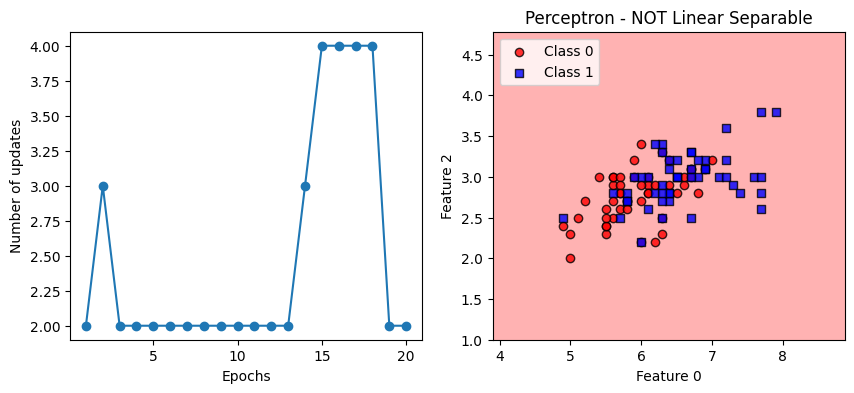

In [87]:
# PERCEPTRON

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# TRAIN
ppn = Perceptron(eta=0.01, n_iter=20)
ppn.fit(X, y)

# ERRORS VS EPOCHS
ax[0].plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Number of updates')

# PLOT DECISION REGIONS
plot_decision_regions(X, y, classifier=ppn)
ax[1].set_title('Perceptron - NOT Linear Separable')
ax[1].set_xlabel('Feature 0')
ax[1].set_ylabel('Feature 2')
ax[1].legend(loc='upper left')

plt.show()

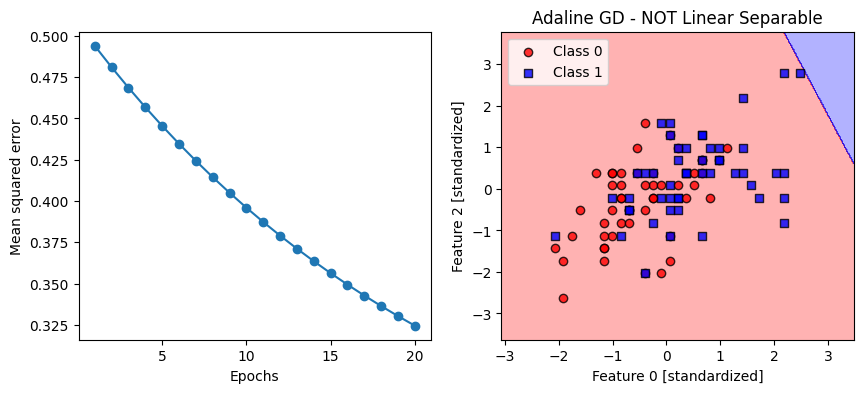

In [88]:
# Adaline GD

# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

# TRAIN
ada_gd = AdalineGD(n_iter=20, eta=0.01)
ada_gd.fit(X_std, y)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# ERRORS VS EPOCHS
ax[0].plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Mean squared error')

# PLOT DECISION REGIONS
plot_decision_regions(X_std, y, classifier=ada_gd)
ax[1].set_title('Adaline GD - NOT Linear Separable')
ax[1].set_xlabel('Feature 0 [standardized]')
ax[1].set_ylabel('Feature 2 [standardized]')
ax[1].legend(loc='upper left')

plt.show()

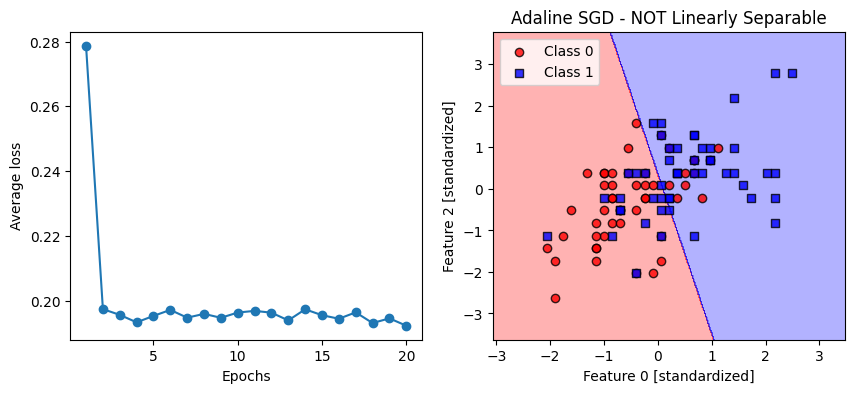

In [89]:
# Adaline SGD

# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

# TRAIN
ada_sgd = AdalineSGD(n_iter=20, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# ERRORS VS EPOCHS
ax[0].plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Average loss')

# PLOT DECISION REGIONS
plot_decision_regions(X_std, y, classifier=ada_sgd)
ax[1].set_title('Adaline SGD - NOT Linearly Separable')
ax[1].set_xlabel('Feature 0 [standardized]')
ax[1].set_ylabel('Feature 2 [standardized]')
ax[1].legend(loc='upper left')

plt.show()


## Step 8
Repeat Step 7) using three features at a time.

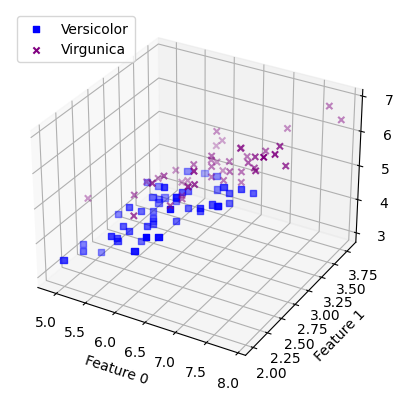

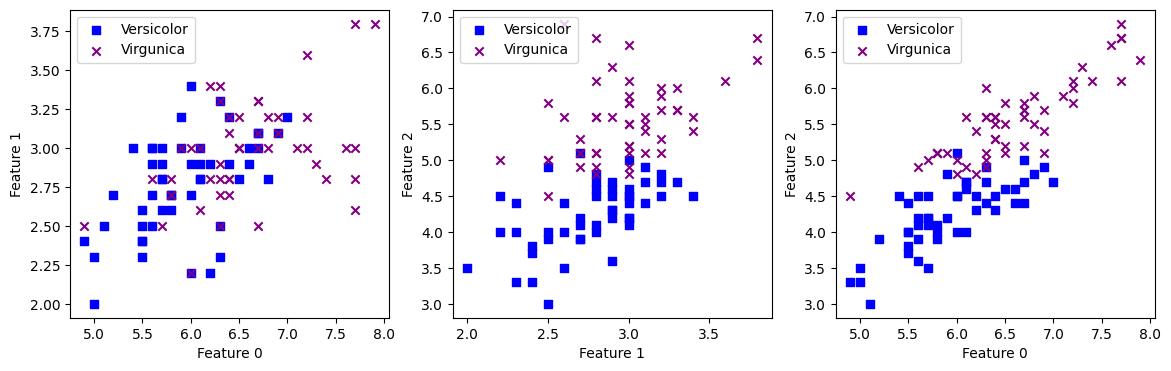

In [90]:
# select Class 1 and Class 2 (Versicolor and Virgunica)
y = df.iloc[50:150, 4].values
y = np.where(y == 'Iris-versicolor', 0, 1)

# extract Feature 0, 1 and 2
X = df.iloc[50:150, 0:3].values

# PLOT DATA
axes = plt.axes(projection = '3d')
axes.scatter3D(X[:50, 0], X[:50, 1], X[:50, 2],
            color='blue', marker='s', label='Versicolor')
axes.scatter3D(X[50:100, 0], X[50:100, 1], X[50:100, 2],
            color='purple', marker='x', label='Virgunica')

axes.set_xlabel('Feature 0')
axes.set_ylabel('Feature 1')
axes.set_zlabel('Feature 2')
plt.legend(loc='upper left')

plt.show()

# PLOT 3 FEATURES
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))

# Feature 0 vs Feature 1
ax[0].scatter(X[:50, 0], X[:50, 1],
            color='blue', marker='s', label='Versicolor')
ax[0].scatter(X[50:100, 0], X[50:100, 1],
            color='purple', marker='x', label='Virgunica')

ax[0].set_xlabel('Feature 0')
ax[0].set_ylabel('Feature 1')
ax[0].legend(loc='upper left')

# Feature 1 vs Feature 2
ax[1].scatter(X[:50, 1], X[:50, 2],
            color='blue', marker='s', label='Versicolor')
ax[1].scatter(X[50:100, 1], X[50:100, 2],
            color='purple', marker='x', label='Virgunica')

ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')
ax[1].legend(loc='upper left')

# Feature 0 vs Feature 2
ax[2].scatter(X[:50, 0], X[:50, 2],
            color='blue', marker='s', label='Versicolor')
ax[2].scatter(X[50:100, 0], X[50:100, 2],
            color='purple', marker='x', label='Virgunica')

ax[2].set_xlabel('Feature 0')
ax[2].set_ylabel('Feature 2')
ax[2].legend(loc='upper left')

plt.show()

### TRAIN

Text(0, 0.5, 'Number of updates')

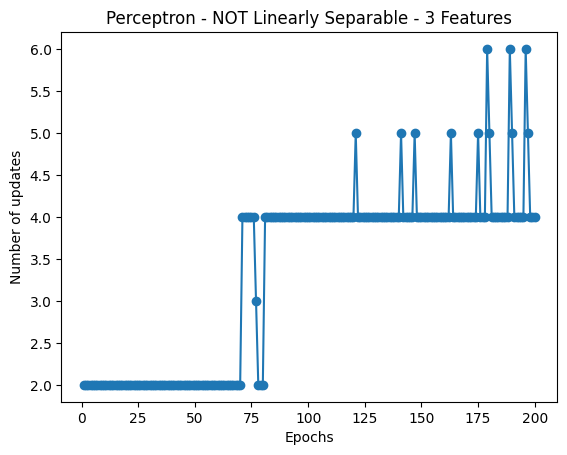

In [91]:
# PERCEPTRON

ppn = Perceptron(eta=0.01, n_iter=200)
ppn.fit(X, y)

# ERRORS VS EPOCHS
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.title('Perceptron - NOT Linearly Separable - 3 Features')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

Text(0, 0.5, 'Mean squared error')

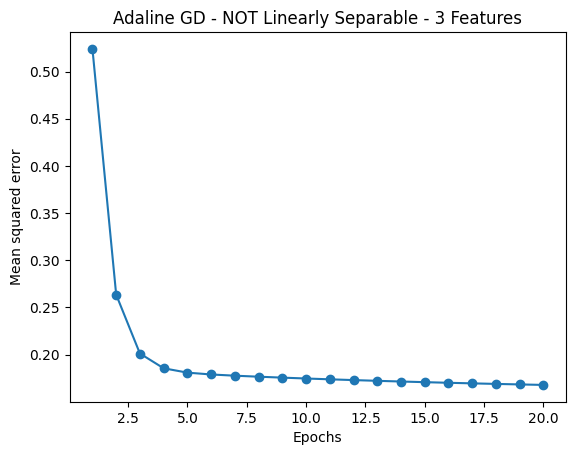

In [92]:
# Adaline GD

# Standardize Features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

# TRAIN
ada_gd = AdalineGD(n_iter=20, eta=0.01)
ada_gd.fit(X_std, y)

# ERRORS VS EPOCHS
plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
plt.title('Adaline GD - NOT Linearly Separable - 3 Features')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')

Text(0, 0.5, 'Average loss')

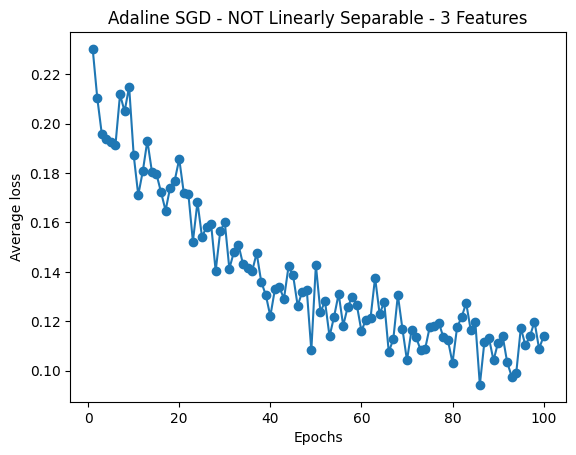

In [93]:
# Adaline SGD

# Standardize Features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

# TRAIN
ada_sgd = AdalineSGD(n_iter=100, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

# ERRORS VS EPOCHS
plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.title('Adaline SGD - NOT Linearly Separable - 3 Features')
plt.xlabel('Epochs')
plt.ylabel('Average loss')

## Step 9
Repeat Step 7) using all four features at the same time.


In [94]:
# select Class 1 and Class 2 (Versicolor and Virgunica)
y = df.iloc[50:150, 4].values
y = np.where(y == 'Iris-versicolor', 0, 1)

# extract all 4 Features
X = df.iloc[50:150, 0:4].values

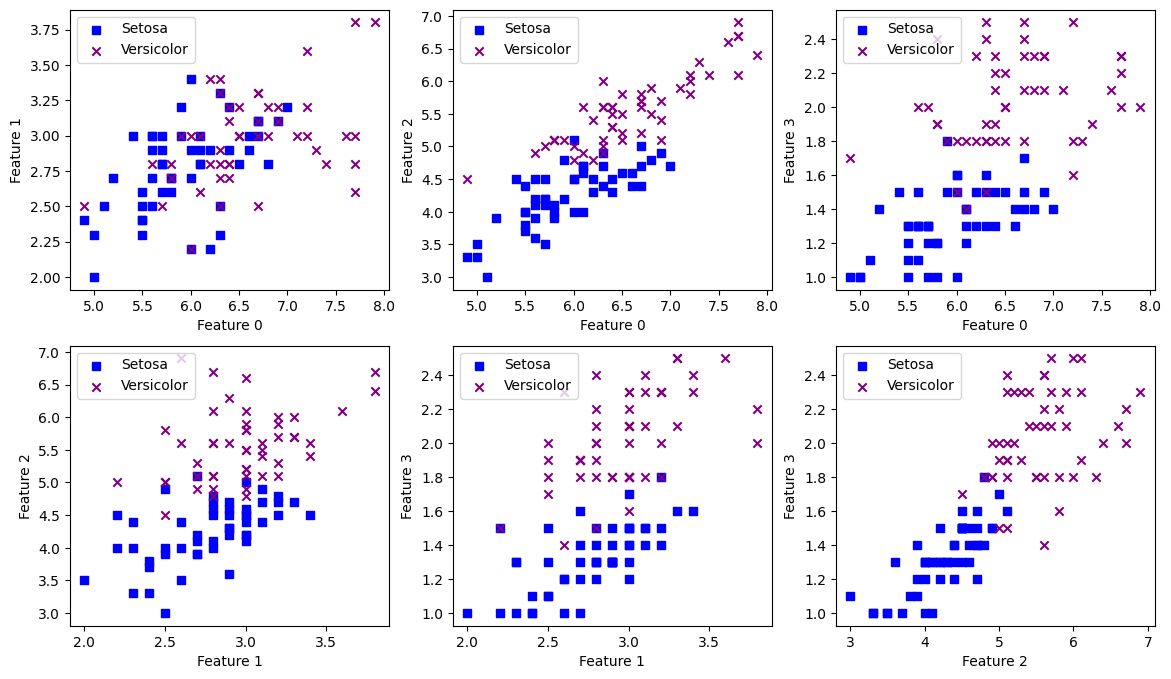

In [95]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))

# Feature 0 vs Feature 1
ax[0, 0].scatter(X[:50, 0], X[:50, 1],
            color='blue', marker='s', label='Setosa')
ax[0, 0].scatter(X[50:100, 0], X[50:100, 1],
            color='purple', marker='x', label='Versicolor')

ax[0, 0].set_xlabel('Feature 0')
ax[0, 0].set_ylabel('Feature 1')
ax[0, 0].legend(loc='upper left')

# Feature 0 vs Feature 2
ax[0, 1].scatter(X[:50, 0], X[:50, 2],
            color='blue', marker='s', label='Setosa')
ax[0, 1].scatter(X[50:100, 0], X[50:100, 2],
            color='purple', marker='x', label='Versicolor')

ax[0, 1].set_xlabel('Feature 0')
ax[0, 1].set_ylabel('Feature 2')
ax[0, 1].legend(loc='upper left')

# Feature 0 vs Feature 3
ax[0, 2].scatter(X[:50, 0], X[:50, 3],
            color='blue', marker='s', label='Setosa')
ax[0, 2].scatter(X[50:100, 0], X[50:100, 3],
            color='purple', marker='x', label='Versicolor')

ax[0, 2].set_xlabel('Feature 0')
ax[0, 2].set_ylabel('Feature 3')
ax[0, 2].legend(loc='upper left')


# Feature 1 vs Feature 2
ax[1, 0].scatter(X[:50, 1], X[:50, 2],
            color='blue', marker='s', label='Setosa')
ax[1, 0].scatter(X[50:100, 1], X[50:100, 2],
            color='purple', marker='x', label='Versicolor')

ax[1, 0].set_xlabel('Feature 1')
ax[1, 0].set_ylabel('Feature 2')
ax[1, 0].legend(loc='upper left')

# Feature 1 vs Feature 3
ax[1, 1].scatter(X[:50, 1], X[:50, 3],
            color='blue', marker='s', label='Setosa')
ax[1, 1].scatter(X[50:100, 1], X[50:100, 3],
            color='purple', marker='x', label='Versicolor')

ax[1, 1].set_xlabel('Feature 1')
ax[1, 1].set_ylabel('Feature 3')
ax[1, 1].legend(loc='upper left')

# Feature 2 vs Feature 3
ax[1, 2].scatter(X[:50, 2], X[:50, 3],
            color='blue', marker='s', label='Setosa')
ax[1, 2].scatter(X[50:100, 2], X[50:100, 3],
            color='purple', marker='x', label='Versicolor')

ax[1, 2].set_xlabel('Feature 2')
ax[1, 2].set_ylabel('Feature 3')
ax[1, 2].legend(loc='upper left')


plt.show()

### TRAIN

Text(0, 0.5, 'Number of updates')

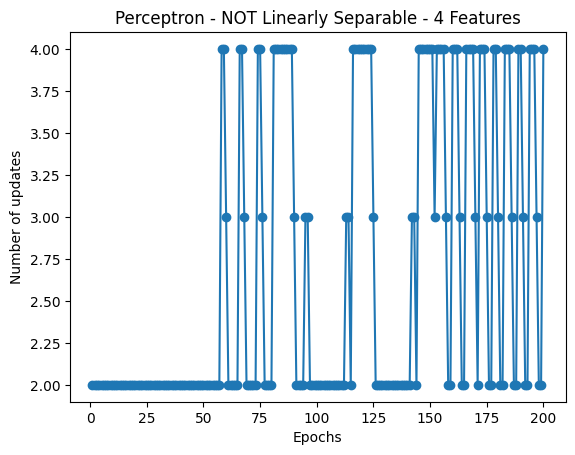

In [96]:
# PERCEPTRON

ppn = Perceptron(eta=0.01, n_iter=200)
ppn.fit(X, y)

# ERRORS VS EPOCHS
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.title('Perceptron - NOT Linearly Separable - 4 Features')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

Text(0, 0.5, 'Mean squared error')

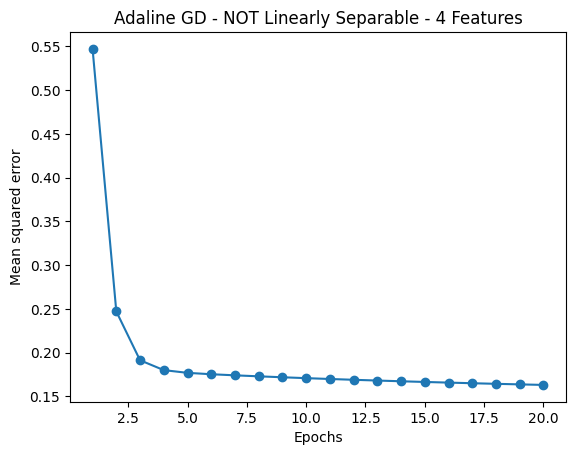

In [97]:
# Adaline GD

# Standardize Features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

# TRAIN
ada_gd = AdalineGD(n_iter=20, eta=0.01)
ada_gd.fit(X_std, y)

# ERRORS VS EPOCHS
plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
plt.title('Adaline GD - NOT Linearly Separable - 4 Features')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')

Text(0, 0.5, 'Average loss')

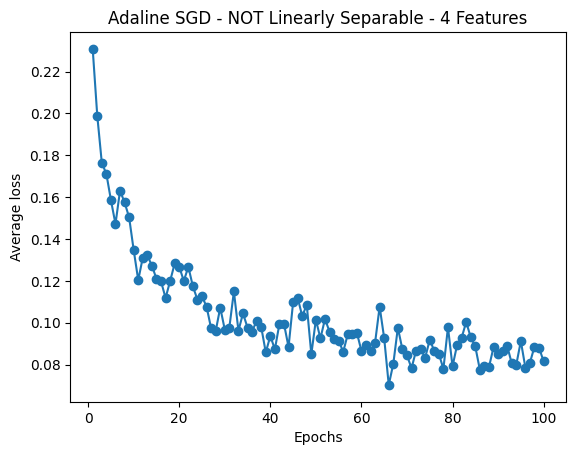

In [98]:
# Adaline SGD

# Standardize Features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

# TRAIN
ada_sgd = AdalineSGD(n_iter=100, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

# ERRORS VS EPOCHS
plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.title('Adaline SGD - NOT Linearly Separable - 4 Features')
plt.xlabel('Epochs')
plt.ylabel('Average loss')

# Step 10
Compare your results for the Perceptron and Adaline models.

I have included all the images in the previous steps.

From the graphs, we can see that for linearly separable data, both the Perceptron and Adaline models perform well. However, in the case of non-linearly separable data, the Adaline algorithm is more stable and exhibits a more gradual performance degradation compared to the Perceptron algorithm.

The Perceptron algorithm is based on a simple error-correction learning rule. Its weight updates are directly contingent on whether the model makes a correct prediction for each training instance: if an instance is correctly classified, the Perceptron makes no change to its weights. If an instance is misclassified, the Perceptron adjusts its weight vector either towards or away from that instance. In scenarios where the data is not linearly separable, such a solution does not exist, leading to continuous oscillation of the Perceptron in the weight space as it tries to find a non-existent solution.

Adaline is based on its mean squared error to update its weights. The weight update in Adaline considers the prediction errors for all training instances and aims to minimize the sum of these errors squared. This approach allows Adaline to find a set of weights that minimizes errors, even when the data is not perfectly linearly separable.

Stochastic Gradient Descent appears to require more epochs and a smaller learning rate compared to Gradient Descent. However, given that this is a small dataset, SGD is expected to perform better with larger datasets.
